In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("Titanic.csv")

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Shape of dataset
print("Shape:", df.shape)

# Data types and non-null counts
print("\nInfo:")
print(df.info())

# Summary statistics (numerical columns)
print("\nSummary statistics:")
print(df.describe())

# Count missing values in each column
print("\nMissing values:")
print(df.isnull().sum())


Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118

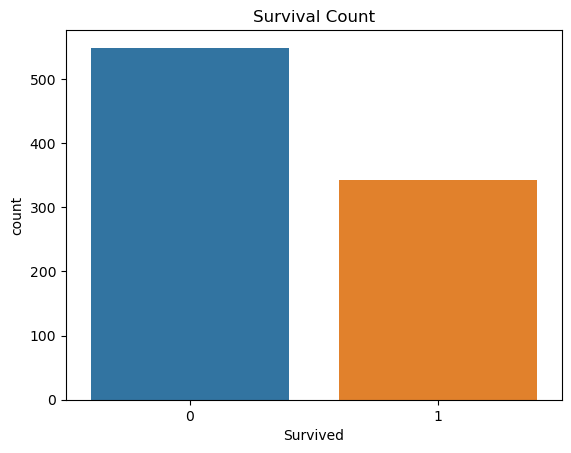

AttributeError: 'numpy.int64' object has no attribute 'startswith'

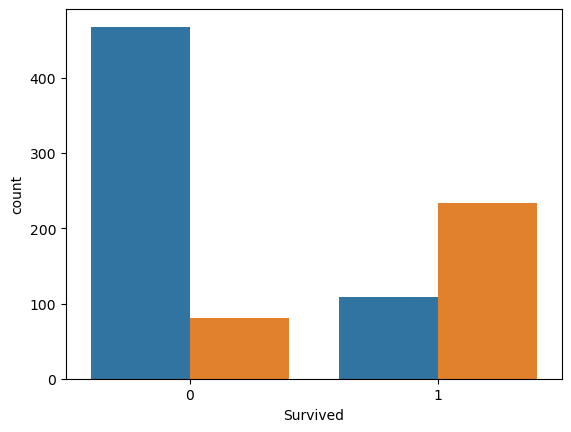

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded

# 1️⃣ Handle missing values
# Fill 'Embarked' with most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# 2️⃣ Extract Titles from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles into 'Rare'
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# 3️⃣ Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and 'Title'
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# 4️⃣ Basic EDA plots

# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Age distribution by survival
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], shade=True, label="Survived")
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], shade=True, label="Did not survive")
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


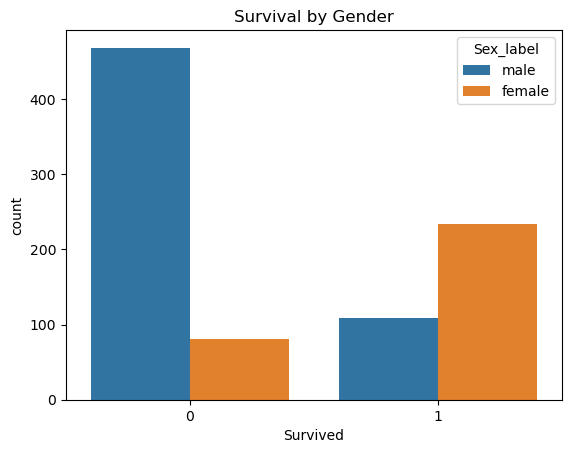

In [6]:
df['Sex_label'] = df['Sex'].map({0: 'male', 1: 'female'})

sns.countplot(x='Survived', hue='Sex_label', data=df)
plt.title('Survival by Gender')
plt.show()


In [7]:
df['Sex_label'] = df['Sex'].map({0: 'male', 1: 'female'})


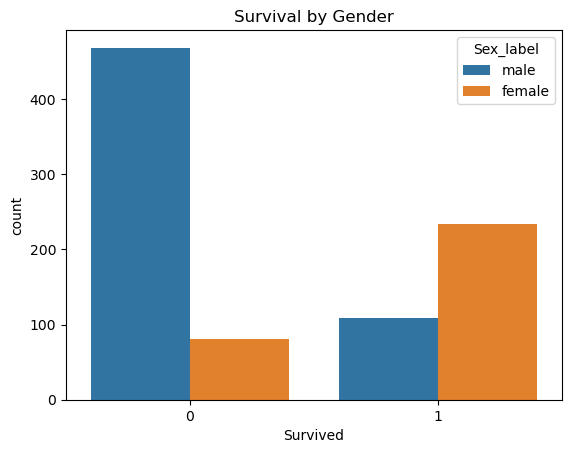

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex_label', data=df)
plt.title('Survival by Gender')
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

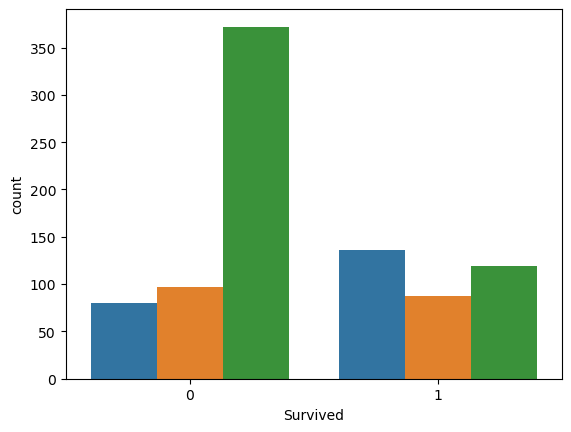

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()


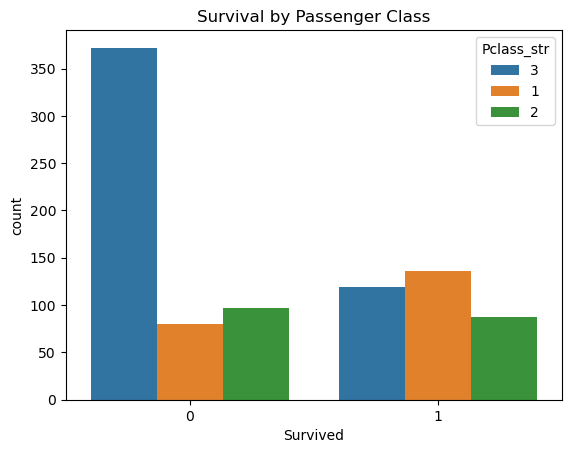

In [10]:
df['Pclass_str'] = df['Pclass'].astype(str)

sns.countplot(x='Survived', hue='Pclass_str', data=df)
plt.title('Survival by Passenger Class')
plt.show()



/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


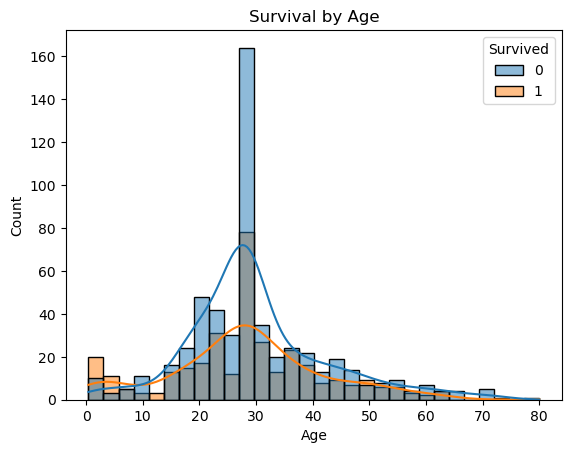

In [11]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Survival by Age')
plt.show()


In [12]:
X = df.drop(columns=['Survived', 'Sex_label'])  # Features
y = df['Survived']  # Target


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [14]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe
df_encoded = df.copy()

# Encode all object-type columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Prepare features and target
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7877094972067039


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
model = LogisticRegression(max_iter=1000)


In [16]:
import joblib
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [18]:
import joblib
joblib.dump(model, 'logistic_model.pkl')


['logistic_model.pkl']